# DAT 203 Assignment 9

- Author: Colin Bowers
- Date: July 15, 2003


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import random

In [2]:
def find_best_n(data):
    
    rng = range(2, 15)
    scores = [ ]
    for k in rng:
        km = KMeans(n_clusters=k, random_state=0, n_init="auto")
        km.fit(data)
        s = silhouette_score(X, km.labels_)
        scores.append(s)

    best_n = np.argmax(scores)+2
    best_score = scores[best_n-2]
    
    return best_n, best_score


In [3]:
def make_random_blobs(num_centers, center_sd):
    X, y = make_blobs(
        n_samples = 300, 
        centers = num_centers,
        random_state = 0, 
        cluster_std = center_sd
    )
    return X


## Do One Manually

In [18]:
n = random.randint(2, 10)
sd = random.randint(1, 99) / 100

n = 6
sd = 0.4

print (f"Number of centers: {n}")
print (f"Std Deviation of each cluster: {sd}")


Number of centers: 6
Std Deviation of each cluster: 0.4


In [19]:
X = make_random_blobs(n, sd)

In [20]:
kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(X)
kmeans.labels_

array([3, 4, 5, 5, 2, 3, 5, 3, 3, 1, 4, 4, 3, 0, 3, 3, 3, 4, 2, 0, 4, 0,
       3, 1, 0, 3, 3, 2, 0, 0, 3, 4, 3, 4, 2, 5, 2, 5, 0, 2, 3, 0, 3, 2,
       4, 4, 4, 3, 3, 3, 5, 0, 3, 0, 4, 3, 0, 3, 4, 0, 4, 2, 2, 0, 1, 4,
       1, 4, 0, 3, 3, 0, 2, 0, 4, 5, 2, 1, 0, 3, 4, 5, 3, 3, 4, 4, 0, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 3, 1, 4, 3, 3, 3, 2, 0, 3, 3,
       0, 2, 2, 0, 3, 0, 5, 2, 2, 2, 3, 5, 0, 2, 2, 5, 3, 0, 0, 3, 3, 3,
       3, 0, 3, 1, 1, 1, 0, 3, 2, 4, 1, 0, 4, 3, 4, 4, 1, 3, 1, 3, 0, 5,
       3, 4, 1, 0, 3, 4, 3, 3, 1, 4, 5, 3, 3, 5, 3, 3, 3, 2, 0, 1, 3, 2,
       2, 3, 4, 3, 3, 5, 0, 3, 3, 3, 0, 2, 3, 0, 1, 2, 3, 3, 3, 3, 4, 0,
       3, 4, 3, 2, 0, 0, 1, 2, 0, 3, 2, 1, 3, 1, 3, 4, 0, 5, 2, 4, 2, 0,
       3, 3, 1, 0, 0, 3, 3, 3, 4, 3, 2, 0, 3, 0, 3, 1, 1, 2, 3, 4, 3, 3,
       0, 3, 1, 3, 1, 4, 5, 2, 3, 3, 4, 4, 1, 4, 0, 2, 3, 2, 0, 1, 2, 3,
       4, 3, 3, 5, 2, 1, 5, 3, 1, 2, 3, 3, 0, 0, 3, 2, 2, 2, 2, 4, 5, 3,
       2, 3, 3, 3, 3, 5, 0, 4, 2, 3, 3, 4, 4, 5], d

In [21]:
kmeans.cluster_centers_

array([[-1.33256997,  7.75172616],
       [ 9.00158473, -2.54549347],
       [ 2.04553861,  0.93136746],
       [-0.31798526,  3.6328617 ],
       [ 5.69742997,  0.48550297],
       [ 9.63873334, -2.10895498]])

In [22]:
score = silhouette_score(X, kmeans.labels_)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.641


In [23]:
k2, ss2 = find_best_n(X)
km2 = KMeans(n_clusters=k2, random_state=0, n_init="auto").fit(X)
print(f"Ideal number of clusters is {k2} with a score of {ss2:.2f}.")

Ideal number of clusters is 7 with a score of 0.72.


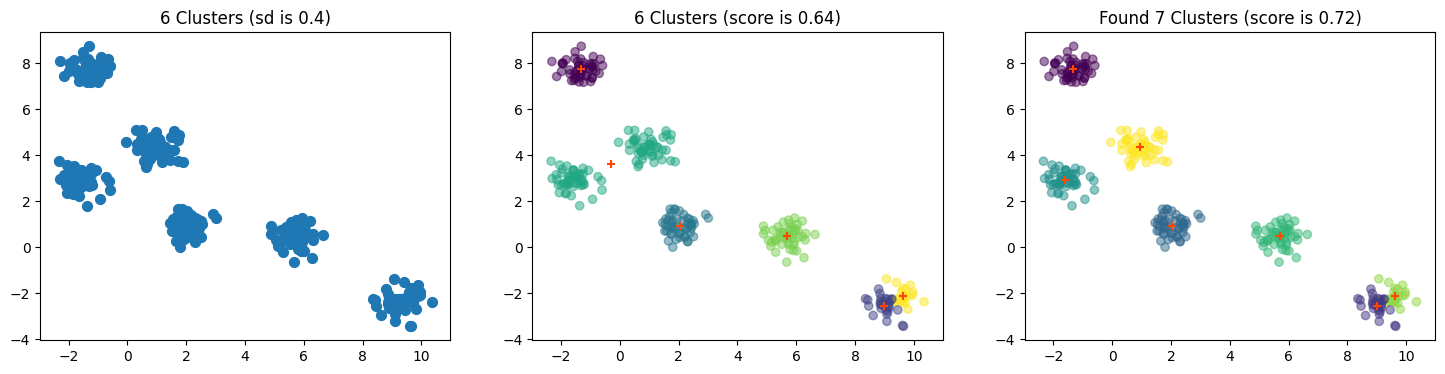

In [24]:
plt.figure(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title(f"{n} Clusters (sd is {sd})")

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", color="orangered")
plt.title(f"{n} Clusters (score is {score:.2f})")

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_, alpha=0.5)
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], marker="+", color="orangered")
plt.title(f"Found {k2} Clusters (score is {ss2:.2f})")

plt.show()

In [ ]:
#plt.plot(rng, scores, "-")
#plt.title("Silhoutte Scores for Num Clusters")
#plt.xlabel("No. of Clusters")
#plt.ylabel("Silhoutte Scores")
#plt.show()

## Repeat 100 Times

In [25]:
%%time 
results = [ ] 
for i in range(1, 100):
    
    n = random.randint(2, 10)
    sd = random.randint(1, 99) / 100
    
    X = make_random_blobs(n, sd)
    k, ss = find_best_n(X)
    
    if n == k:
        match = "correct!"
    else:
        match = "INCORRECT"

    #print(f"{i}: For {n} actual clusters with sd={sd}, found {k} ({match}) with score={ss:.3f}.")
    values = [ i, n, sd, k, ss, n==k ]
    results.append(values)
    
#results
df = pd.DataFrame(
    results,
    columns=["iteration", "num_clusters", "std", "found_num_clusters", "score", "is_correct" ]
)
print(f"Resulting data frame (rows, cols): {df.shape}")
print("--------------------------")

--------------------------
CPU times: user 13min 30s, sys: 13min 23s, total: 26min 54s
Wall time: 3min 35s


In [28]:
df[ df['is_correct'] == False ]

,iteration,num_clusters,std,found_num_clusters,score,is_correct
1,2,8,0.89,3,0.600297,False
13,14,5,0.90,2,0.668002,False
24,25,8,0.69,2,0.663256,False
27,28,6,0.42,5,0.708194,False
40,41,8,0.95,3,0.596709,False
46,47,9,0.87,4,0.608396,False
52,53,9,0.78,5,0.619822,False
58,59,8,0.68,2,0.663554,False
64,65,7,0.91,2,0.549691,False
65,66,10,0.84,6,0.602644,False


In [30]:
df['is_correct'].value_counts()

True     83
False    16
Name: is_correct, dtype: int64